

# Before doing any data analysis we need to understand how to categorize credit card users.

### Majorly there are 4 types of credit card user:
### 1) Transactors: Customers who pay least amount of interest charges and are careful with their money.
### 2) Revolvers: Customers who use their credit card as a loan. This group is most lucrative for bank since they pay 20%+ interest.
### 3) VIP/Prime: Customers with high credit limit/% of full payment; targetted to increase their credit limit spending.
### 4) New Consumers: Customers with low tenure who can be targeted to enroll in other bank services(ex: travel credit card).

### Keeping these categories of user in mind, now we can proceed with our segmentation. Main targets will be revolvers and VIP/Prime users as these categories give  high probability of giving interest to the bank.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px


In [3]:
df = pd.read_csv("Data for Associate DS.csv")

In [4]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [ ]:
df.isna().sum()

In [7]:
# Filling up the missing elements with mean their mean. 
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

In [8]:
px.scatter(df, x="BALANCE_FREQUENCY", y = "BALANCE", color="TENURE")

### If we look at the above scatter plot, users having balance frequency more than 0.6 and balance more than 1.5K may fall into revolver category. Positive sign is that most of the customers in this category are long term users, with roll over balance going up to 19K.

In [40]:
gg = df.copy()

In [42]:
#balance to credit ratio

gg['B2C_ratio'] = gg.BALANCE/gg.CREDIT_LIMIT
gg

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  B2C_ratio  
0      201.802084        139.509787          0.000000      12   0.040901  
1     4103.032597       1072.340217          0.222222      12   0.457495  
2      622.066742        627.284787          0.000000      12   0.332687  
3        0.000000        864.206542          0.000000      12   0.222223  
4      678.334763        244.791237          0.000000      12   0.681429  
...           ...               ...               ...     ...        ...  
8945   325.594462         48.886365          0.500000       6

In [51]:
px.scatter(gg[gg.B2C_ratio >1], x="B2C_ratio", y = "PURCHASES_INSTALLMENTS_FREQUENCY", color="TENURE")

## Identified some users as revolvers or VIP. These users have more balance than their credit limit which means they will have to pay interest.

In [10]:
#dropping customer id as it is not important

df.drop(['CUST_ID'],inplace  =True, axis =1)

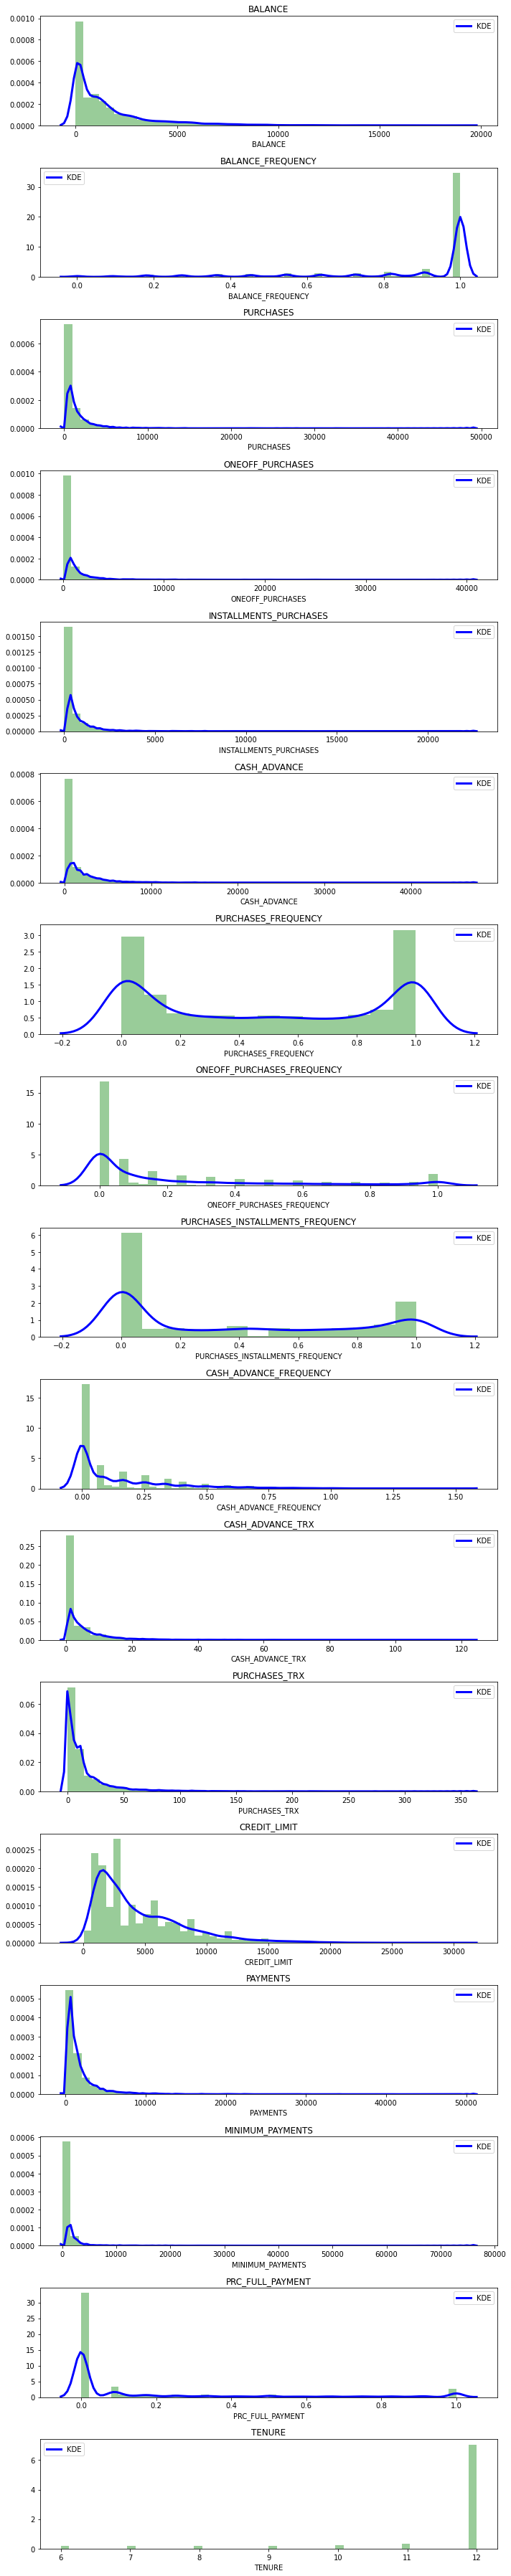

In [52]:

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~12 years tenure

plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(df.columns[i])

plt.tight_layout()
plt.savefig('All dist.png')

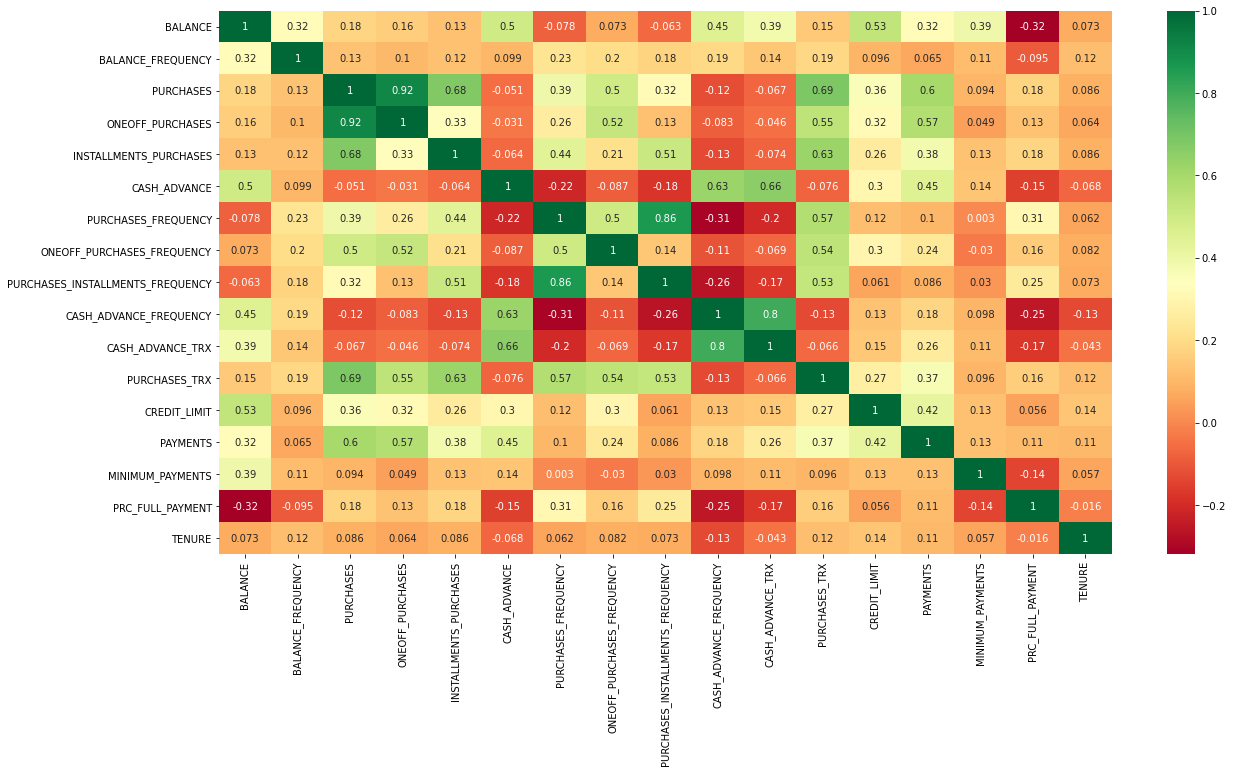

In [54]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### With this correlation matrix we can observe that:-
### Purchases is positively correlated with oneoff_purchases, installment_purchases, Purchases_trx, Payments
### Similar trend can be observed with Balance and Credit limit.

In [13]:
#scaling the data first
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

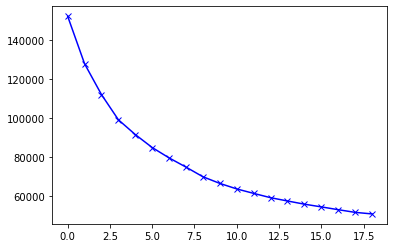

In [14]:
# Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
#       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
#       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
#       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
#       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
#       'TENURE'], dtype='object')

scores_1 = []
range_values = range(1,20)
for i in range_values:
    kmeans= KMeans(n_clusters =i)
    kmeans.fit(df_scaled)
    scores_1.append(kmeans.inertia_)
    
plt.plot(scores_1,'bx-')
# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 7.

In [15]:
kmeans = KMeans(7)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [16]:

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0  1.675303          0.393689 -0.196573        -0.147680   
1  0.145954          0.432553  0.978132         0.924619   
2 -0.335506         -0.348076 -0.284525        -0.208973   
3 -0.701871         -2.130863 -0.305698        -0.228974   
4  0.009321          0.401780 -0.342942        -0.222836   
5  1.488505          0.403475  7.413638         6.553369   
6 -0.368877          0.333280 -0.041571        -0.230827   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.193575     1.996838           -0.448685   
1               0.614066    -0.306253            1.102650   
2              -0.288475     0.065539           -0.198735   
3              -0.302038    -0.323440           -0.545001   
4              -0.401382    -0.102053           -0.813970   
5               5.486972     0.028557            1.072872   
6               0.325605    -0.367268            0.973762   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.185877                        -0.397498   
1                   1.879984                         0.552183   
2                  -0.272572                        -0.230755   
3                  -0.425062                        -0.441065   
4                  -0.333609                        -0.758777   
5                   1.875094                         1.028264   
6                  -0.342756                         1.161390   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               1.908930         1.924814     -0.234325     1.013653   
1              -0.405210        -0.315184      1.233252     0.724423   
2               0.304112        -0.002216     -0.385586    -0.556898   
3              -0.522635        -0.377066     -0.415522    -0.172761   
4               0.088844        -0.037908     -0.465233    -0.300009   
5              -0.309559        -0.107750      4.914457     2.259343   
6              -0.476887        -0.362545      0.170406    -0.275889   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0  0.840550         0.590559        -0.391005  0.068500  
1  0.415184        -0.029566         0.470387  0.307135  
2 -0.390701        -0.209383         0.012899 -3.193765  
3 -0.201157        -0.257660         0.301082  0.201184  
4 -0.246812        -0.015058        -0.451673  0.272475  
5  5.133194         0.782295         0.828775  0.330386  
6 -0.223751        -0.031500         0.294889  0.253261

In [17]:
# In order to understand what these numbers mean, performed inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0  5051.477573          0.970532    583.224191       347.318663   
1  1868.265433          0.979738   3092.998662      2127.116115   
2   866.148306          0.794815    395.311749       245.585564   
3   103.589577          0.372489    350.076084       212.387370   
4  1583.876617          0.972449    270.503813       222.575662   
5  4662.671853          0.972850  16842.556892     11469.688108   
6   796.688300          0.956222    914.388205       209.311182   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             236.019764  5166.333011            0.310272   
1             966.360255   336.644664            0.932897   
2             150.203132  1116.308792            0.410589   
3             137.938126   300.601383            0.271615   
4              48.102526   764.860408            0.163665   
5            5372.868784  1038.757441            0.920946   
6             705.507935   208.692048            0.881168   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.147007                         0.206462   
1                   0.763293                         0.583889   
2                   0.121144                         0.272729   
3                   0.075654                         0.189147   
4                   0.102936                         0.062880   
5                   0.761835                         0.773096   
6                   0.100207                         0.826004   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX  CREDIT_LIMIT  \
0               0.517141        16.384270      8.885393   8182.533197   
1               0.054057         1.097930     45.363854   7130.196873   
2               0.196000         3.233704      5.125596   2468.226470   
3               0.030560         0.675630      4.381513   3865.873483   
4               0.152923         2.990134      3.145877   3402.895231   
5               0.073198         2.513514    136.864865  12714.864865   
6               0.039714         0.774723     18.945490   3490.651328   

       PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0   4166.452564      2240.478268         0.039352  11.608989  
1   2935.060977       795.305143         0.291295  11.928344  
2    602.104087       376.247870         0.157487   7.243243  
3   1150.813224       263.740163         0.241776  11.786555  
4   1018.645917       829.114666         0.021608  11.881959  
5  16593.236130      2687.311037         0.396117  11.959459  
6   1085.407772       790.796186         0.239965  11.856247

### Keeping users' categories in mind and with the help of Kmeans clustering we can segment users easily.

### First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance (103) and cash advance (300), Percentage of full payment(PRC) = 27%
### Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ( 5000) and cash advance (5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16.5) and low percentage of full payment (3.9%)
### Third customer cluster (VIP/Prime): high credit limit 12K and highest percentage of full payment, target for increase credit limit and increase spending habits
### Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 

#### NOTE:  These values may change minutely with each run.

In [18]:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

array([0, 3, 5, ..., 6, 6, 6], dtype=int32)

In [19]:
# concatenate the clusters labels to our original dataframe
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        4  
1  4103.032597       1072.340217          0.222222      12        0  
2   622.066742        627.284787          0.000000      12        1  
3     0.000000        864.206542          0.000000      12        4  
4   678.334763        244.791237          0.000000      12        4

In [20]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [26]:
#principal components 
pca = PCA(n_components =2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.68222239, -1.07645086],
       [-1.13830677,  2.50646783],
       [ 0.96968293, -0.38351965],
       ...,
       [-0.92620262, -1.8107823 ],
       [-2.3365518 , -0.65796383],
       [-0.55642182, -0.40046851]])

In [27]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

pca1      pca2
0 -1.682222 -1.076451
1 -1.138307  2.506468
2  0.969683 -0.383520
3 -0.873620  0.043167
4 -1.599438 -0.688581

In [28]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -1.682222 -1.076451        4
1 -1.138307  2.506468        0
2  0.969683 -0.383520        1
3 -0.873620  0.043167        4
4 -1.599438 -0.688581        4

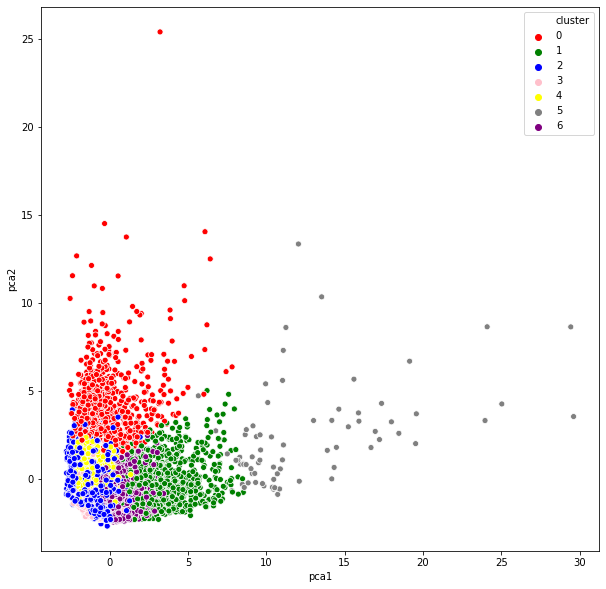

<Figure size 432x288 with 0 Axes>

In [56]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple'])
plt.show()
plt.savefig('Clusters.png')

# Cluster 3 are transactors

# Cluster 0 are Revolvers

# Cluster 5 are VIP/Prime

# Cluster 2 are Low tenure

# Users from Rest of the clusters can belong to one of the above mention category.

### Now we can develop a marketing strategy keeping accordingly, like giving customized or new plan to Revolvers. And giving more credit limit to Prime users. 